In [1]:
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta
import plotly
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image


In [8]:
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv',usecols = list(range(0,10)))

In [9]:
# check what is in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8304 entries, 0 to 8303
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dateRep                  8304 non-null   object 
 1   day                      8304 non-null   int64  
 2   month                    8304 non-null   int64  
 3   year                     8304 non-null   int64  
 4   cases                    8304 non-null   int64  
 5   deaths                   8304 non-null   int64  
 6   countriesAndTerritories  8304 non-null   object 
 7   geoId                    8285 non-null   object 
 8   countryterritoryCode     8230 non-null   object 
 9   popData2018              8282 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 648.9+ KB


Very important to note that data are in long format (countries are all listed in one column, so we can't just plot a whole column as is)

In [18]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
83,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0
82,2020-01-01,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
81,2020-01-02,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
80,2020-01-03,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
79,2020-01-04,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
8295,2020-03-29,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0
8294,2020-03-30,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8293,2020-03-31,31,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
8292,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [3]:
# make datetime
data['dateRep'] = pd.to_datetime(data['dateRep'], dayfirst=True)

#sort values by country and date
data.sort_values(by=['countriesAndTerritories','dateRep'], ascending = True, inplace = True)

#reindex the data now its sorted to prevent errors when creating aggregates
data = data.reindex()

In [4]:
# create a global aggregate figure for cases and deaths
world = data[['dateRep','cases','deaths','popData2018']].groupby(by='dateRep').sum()

In [5]:
world['day'] = world.index.day
world['month'] = world.index.month
world['year'] = world.index.year
world['dateRep'] = world.index
world['countriesAndTerritories'] = 'World'
world['geoId'] = 'WD'
world['countryterritoryCode']  = 'WLD'

In [6]:
df = pd.concat([data, world], ignore_index=True)

# Basics of a plotly plot

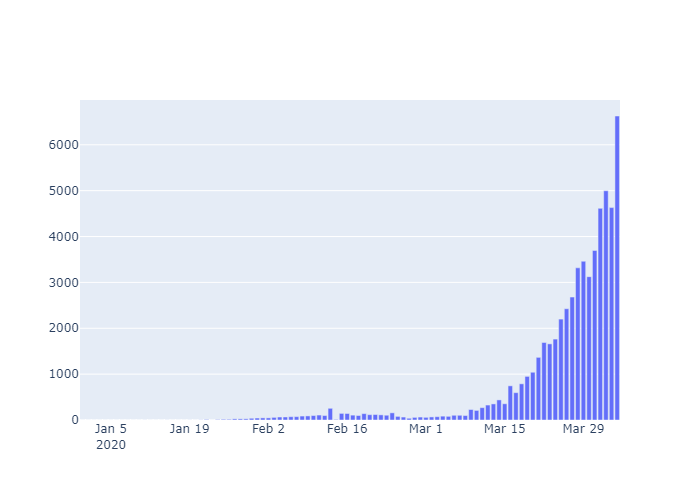

In [9]:
chart_data = df.loc[df['countriesAndTerritories'] == 'World'].reset_index()
x = chart_data ['dateRep']
y = chart_data ['deaths']
trace0 = go.Bar(x=x, y=y)
fig = go.Figure(trace0)
Image(pio.to_image(fig, format='png'))

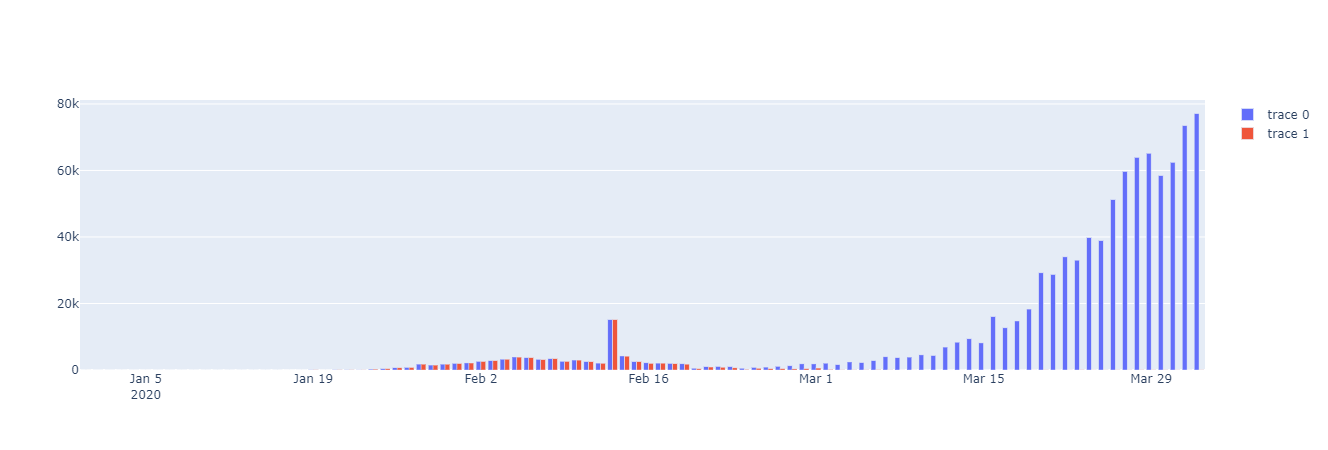

In [37]:
chart_data = df.loc[df['countriesAndTerritories'] == 'World'].reset_index()
chart_data1 = df.loc[df['countriesAndTerritories'] == 'China'].reset_index()
x = chart_data ['dateRep']
y = chart_data ['cases']
x1 = chart_data1 ['dateRep']
y1 = chart_data1 ['cases']
trace0 = go.Bar(x=x, y=y)
trace1 = go.Bar(x=x1, y=y1)
fig = go.Figure([trace0, trace1])
fig.show()

# lets do some labelling

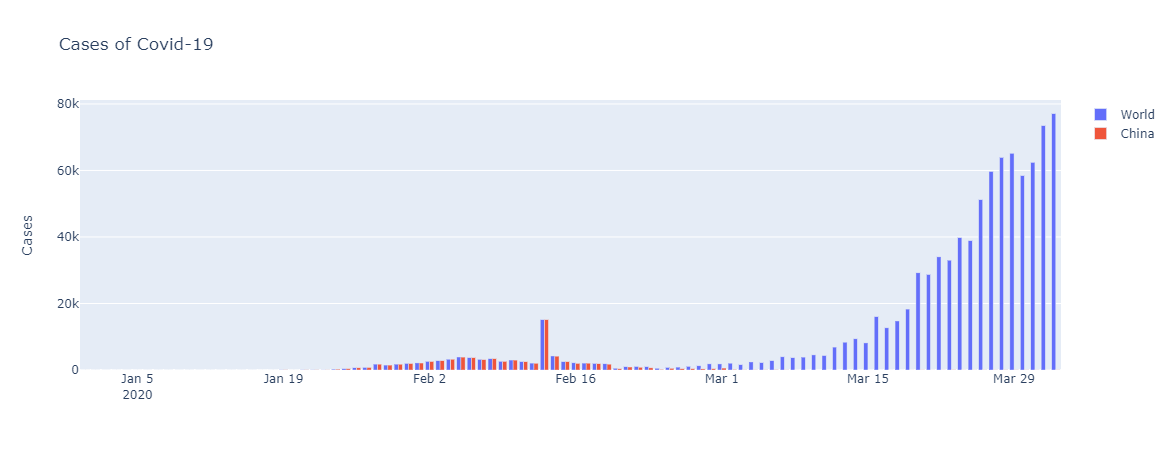

In [39]:
chart_data = df.loc[df['countriesAndTerritories'] == 'World'].reset_index()
chart_data1 = df.loc[df['countriesAndTerritories'] == 'China'].reset_index()
x = chart_data ['dateRep']
y = chart_data ['cases']
x1 = chart_data1 ['dateRep']
y1 = chart_data1 ['cases']
trace0 = go.Bar(x=x, y=y, name = 'World')
trace1 = go.Bar(x=x1, y=y1, name = 'China')

fig = go.Figure([trace0, trace1])
fig.update_layout(title = 'Cases of Covid-19')
fig.layout.yaxis.update(title='Cases')

fig.show()

Lets limit the x-axis

Change the chart to a line chart instead